In [2]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import Sequential 
from tensorflow.keras.losses import MeanSquaredError,BinaryCrossentropy
from tensorflow.keras.activations import sigmoid 
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d,sigmoidnp,plt_linear,plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging 
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

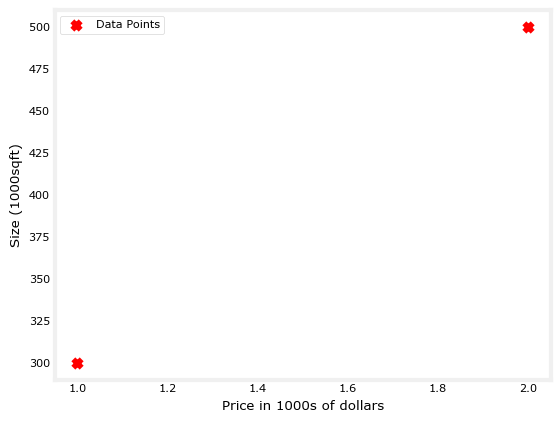

In [3]:
X_train = np.array([[1.0],[2.0]],dtype=np.float32)
Y_train = np.array([[300.0],[500.0]],dtype=np.float32)
fig,ax = plt.subplots(1,1)
ax.scatter(X_train,Y_train,marker='x',c='r',label='Data Points')
ax.legend()
ax.set_xlabel('Price in 1000s of dollars')
ax.set_ylabel('Size (1000sqft)')
plt.show()

In [5]:
#we are creating one layer Dense indicates that its connected all the neurons in the previous layer
linear_layer = tf.keras.layers.Dense(units=1,activation='linear',)
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[-0.73]], shape=(1, 1), dtype=float32)


In [6]:
w,b = linear_layer.get_weights()
print(f"w = {w},b = {b}")

w = [[-0.73]],b = [0.]


In [8]:
set_w = np.array([[200]])
set_b = np.array([100])
linear_layer.set_weights([set_w,set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [10]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [12]:
pred_tf = linear_layer(X_train)
pred_np = np.dot(X_train,set_w) + set_b

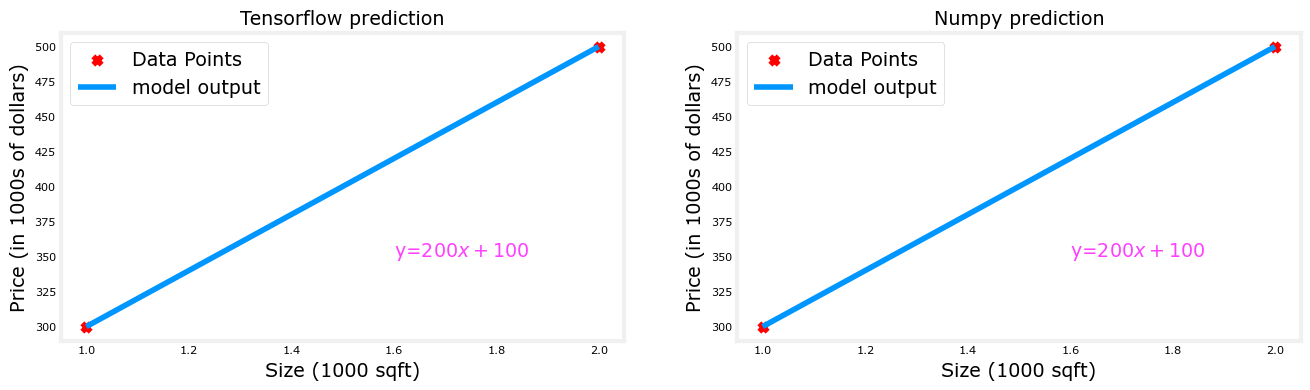

In [13]:
plt_linear(X_train,Y_train,pred_tf,pred_np)

In [14]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [15]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

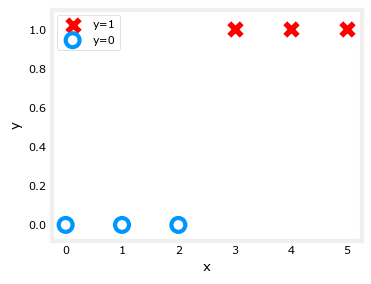

In [16]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos],Y_train[pos],marker='x',s=80,c='red',label='y=1')
ax.scatter(X_train[neg],Y_train[neg],marker= 'o',s=100,label='y=0',facecolors='none',
           edgecolors=dlc['dlblue'],lw=3)
ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()
plt.show()

In [18]:
#create a stack of layers
model = Sequential([
    tf.keras.layers.Dense(1,input_dim=1,activation='sigmoid',name='L1')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)


[[-0.32]] [0.]
(1, 1) (1,)


In [21]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 [==============================] - 0s 104ms/step
[[0.5]]
[[1.]]


1/1 [==============================] - 0s 38ms/step


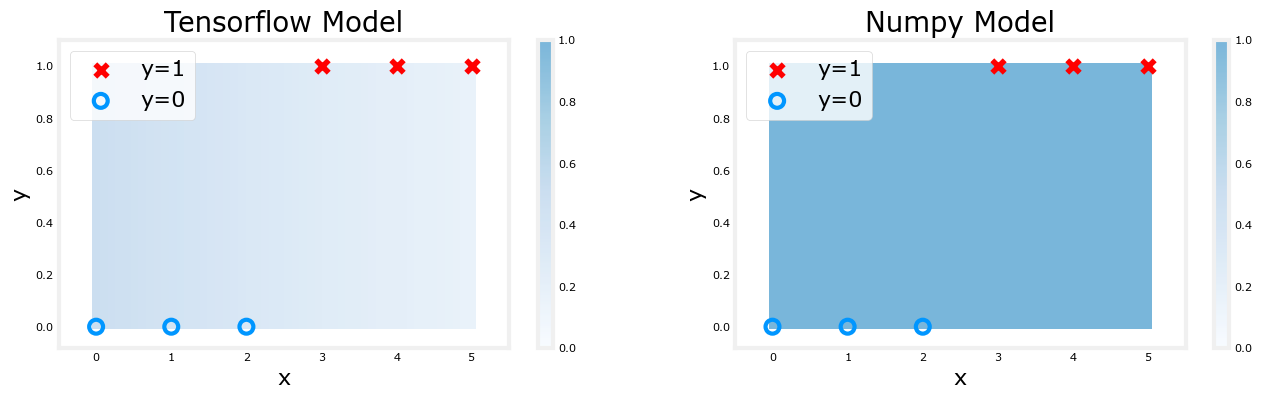

In [22]:
plt_logistic(X_train,Y_train,model,set_w,set_b,pos,neg)